In [10]:
import PIL
import torch
import transformers
from PIL import Image
import requests
from torchsummary import summary
import matplotlib.pyplot as plt
print(f"PIL version: {PIL.__version__}")
print(f"Torch version: {torch.__version__}")
print(f"Transformers version: {transformers.__version__}")

PIL version: 11.0.0
Torch version: 2.5.1+cu124
Transformers version: 4.48.0


In [11]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("Using CPU")

Using GPU: NVIDIA GeForce GTX 1650


In [83]:
# Load model directly
from transformers import AutoImageProcessor, AutoModelForPreTraining, AutoModel,AutoFeatureExtractor, ViTMSNModel

# processor = AutoImageProcessor.from_pretrained("facebook/vit-mae-base" , use_fast=True)
# model = AutoModel.from_pretrained("facebook/vit-mae-base")
processor = AutoImageProcessor.from_pretrained("facebook/vit-msn-base-4")
model = AutoModel.from_pretrained("facebook/vit-msn-base-4")
model.eval()
print(model.type)
print('done')


<bound method Module.type of ViTMSNModel(
  (embeddings): ViTMSNEmbeddings(
    (patch_embeddings): ViTMSNPatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(4, 4), stride=(4, 4))
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): ViTMSNEncoder(
    (layer): ModuleList(
      (0-11): 12 x ViTMSNLayer(
        (attention): ViTMSNSdpaAttention(
          (attention): ViTMSNSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (output): ViTMSNSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
        (intermediate): ViTMSNIntermediate(
          (dense): Linear(in_features=768, out_features=3072,

In [86]:
print(dir(model.encoder))
#print(model.encoder.layer)
print(model.embeddings)


['T_destination', '__annotations__', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_apply', '_backward_hooks', '_backward_pre_hooks', '_buffers', '_call_impl', '_compiled_call_impl', '_forward_hooks', '_forward_hooks_always_called', '_forward_hooks_with_kwargs', '_forward_pre_hooks', '_forward_pre_hooks_with_kwargs', '_get_backward_hooks', '_get_backward_pre_hooks', '_get_name', '_is_full_backward_hook', '_is_hf_initialized', '_load_from_state_dict', '_load_state_dict_post_hooks', '_load_state_dict_pre_hooks', '_maybe_warn_non_full_backward_hook', '_modules', '_named_members', '_non_persistent_buffers_set', '_parameters', '_register_l

In [98]:
print(type(model.named_parameters()))
for n,v in model.named_parameters():
    print(n)
print(model.embeddings.cls_token.shape) #initial cls token
print(model.embeddings.position_embeddings.shape) 

#w1 = layer1_params.get(f"model.layers.{layer1_idx}.{weight_type}")
    # weight_types = [
    #     "mlp.down_proj.weight",
    #     "mlp.up_proj.weight", 
    #     "mlp.gate_proj.weight",
    #     "self_attn.k_proj.weight",
    #     "self_attn.o_proj.weight",
    #     "self_attn.q_proj.weight",
    #     "self_attn.v_proj.weight",
    # ]
    

<class 'generator'>
embeddings.cls_token
embeddings.position_embeddings
embeddings.patch_embeddings.projection.weight
embeddings.patch_embeddings.projection.bias
encoder.layer.0.attention.attention.query.weight
encoder.layer.0.attention.attention.query.bias
encoder.layer.0.attention.attention.key.weight
encoder.layer.0.attention.attention.key.bias
encoder.layer.0.attention.attention.value.weight
encoder.layer.0.attention.attention.value.bias
encoder.layer.0.attention.output.dense.weight
encoder.layer.0.attention.output.dense.bias
encoder.layer.0.intermediate.dense.weight
encoder.layer.0.intermediate.dense.bias
encoder.layer.0.output.dense.weight
encoder.layer.0.output.dense.bias
encoder.layer.0.layernorm_before.weight
encoder.layer.0.layernorm_before.bias
encoder.layer.0.layernorm_after.weight
encoder.layer.0.layernorm_after.bias
encoder.layer.1.attention.attention.query.weight
encoder.layer.1.attention.attention.query.bias
encoder.layer.1.attention.attention.key.weight
encoder.layer.1

In [59]:
model = model.to('cuda:0')
print(type(model))
configuration = model.config
print(configuration)



<class 'transformers.models.vit_msn.modeling_vit_msn.ViTMSNModel'>
ViTMSNConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "facebook/vit-msn-base-4",
  "architectures": [
    "ViTMSNModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "id2label": {
    "0": "tench, Tinca tinca",
    "1": "goldfish, Carassius auratus",
    "2": "great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias",
    "3": "tiger shark, Galeocerdo cuvieri",
    "4": "hammerhead, hammerhead shark",
    "5": "electric ray, crampfish, numbfish, torpedo",
    "6": "stingray",
    "7": "cock",
    "8": "hen",
    "9": "ostrich, Struthio camelus",
    "10": "brambling, Fringilla montifringilla",
    "11": "goldfinch, Carduelis carduelis",
    "12": "house finch, linnet, Carpodacus mexicanus",
    "13": "junco, snowbird",
    "14": "indigo bunting, indigo finch, indigo bird, Passerina cyanea",
    "15"

<class 'transformers.image_processing_base.BatchFeature'>
dict_keys(['pixel_values'])
<class 'torch.Tensor'>
size of image after processor  torch.Size([3, 224, 224])
range of transformed_image tensor(1.)    tensor(0.)


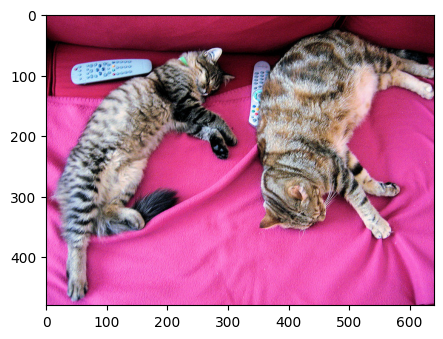

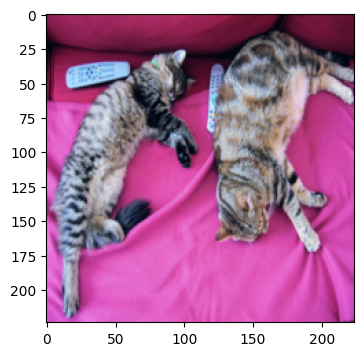

In [74]:
url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)
inputs = processor(images=image, return_tensors="pt")

print(type(inputs))
print(inputs.keys())

transformed_image = inputs['pixel_values']
print(type(transformed_image))
print('size of image after processor ' , transformed_image.squeeze().shape)
transformed_image = (transformed_image - transformed_image.min())/(transformed_image.max() - transformed_image.min())
print('range of transformed_image', transformed_image.max() , '  ' , transformed_image.min())

plt.figure(figsize= (5,4))
plt.imshow(image)
plt.show()

inputs_show = transformed_image.squeeze().permute(1,2,0).detach().numpy()

plt.figure(figsize=(5, 4))
plt.imshow(inputs_show)    
plt.show()

inputs = inputs.to('cuda')


In [61]:
outputs = model(**inputs)

last_hidden_state = outputs.last_hidden_state


In [62]:
print(dir(outputs))
print(type(outputs))
print(outputs.keys())
print(outputs.hidden_states)

['__annotations__', '__class__', '__class_getitem__', '__contains__', '__dataclass_fields__', '__dataclass_params__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__ior__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__or__', '__post_init__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__ror__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'attentions', 'clear', 'copy', 'fromkeys', 'get', 'hidden_states', 'items', 'keys', 'last_hidden_state', 'move_to_end', 'pop', 'popitem', 'setdefault', 'to_tuple', 'update', 'values']
<class 'transformers.modeling_outputs.BaseModelOutput'>
odict_keys(['last_hidden_state'])
None


In [63]:
print(dir(last_hidden_state))
print(type(last_hidden_state))
print(last_hidden_state.shape)
last_hidden_state =  last_hidden_state.to('cpu').permute(1,2,0).detach().numpy()

['H', 'T', '__abs__', '__add__', '__and__', '__array__', '__array_priority__', '__array_wrap__', '__bool__', '__class__', '__complex__', '__contains__', '__cuda_array_interface__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__', '__dlpack__', '__dlpack_device__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__idiv__', '__ifloordiv__', '__ilshift__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__long__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdiv__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rfloordiv__', '__rlshift__', '__rmat

(3137, 768, 1)


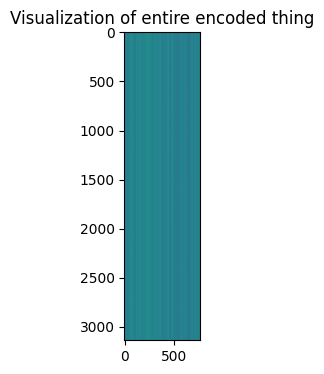

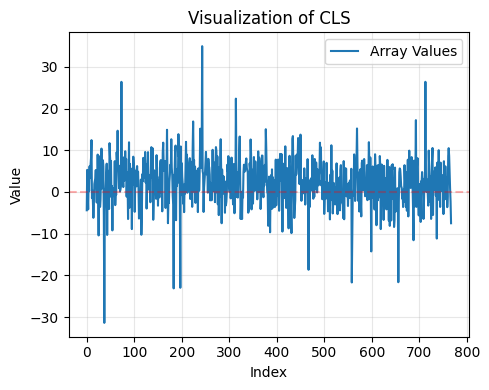

In [73]:
print(last_hidden_state.shape)
plt.figure(figsize=(5, 4))
plt.title('Visualization of entire encoded thing')
plt.imshow(last_hidden_state)    
plt.show()

cls = last_hidden_state[0]
# Create the visualization
plt.figure(figsize=(5, 4))

# Plot the values
plt.plot(cls, label='Array Values')

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)

# Customize the plot
plt.title('Visualization of CLS')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [70]:
output_embeddings = model.get_output_embeddings
print(output_embeddings)

<bound method PreTrainedModel.get_output_embeddings of ViTMSNModel(
  (embeddings): ViTMSNEmbeddings(
    (patch_embeddings): ViTMSNPatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(4, 4), stride=(4, 4))
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): ViTMSNEncoder(
    (layer): ModuleList(
      (0-11): 12 x ViTMSNLayer(
        (attention): ViTMSNSdpaAttention(
          (attention): ViTMSNSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (output): ViTMSNSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
        (intermediate): ViTMSNIntermediate(
          (dense): Linear(in_featur

torch.Size([1, 196])
tensor(147., device='cuda:0')
['H', 'T', '__abs__', '__add__', '__and__', '__array__', '__array_priority__', '__array_wrap__', '__bool__', '__class__', '__complex__', '__contains__', '__cuda_array_interface__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__', '__dlpack__', '__dlpack_device__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__idiv__', '__ifloordiv__', '__ilshift__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__long__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdiv__', '__reduce__', '__reduce_ex__', '__repr__', '__r

In [1]:
import torch
import umap
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np


In [8]:
# Example data (replace this with your actual data)
data = torch.randn(5, 50)  # 5 samples, 50-dimensional vectors
labels = torch.tensor([0, 1, 2, 3, 4])  # Replace with your class labels


c:\Users\hp\miniconda3\envs\mka_research\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\hp\miniconda3\envs\mka_research\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\hp\miniconda3\envs\mka_research\lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


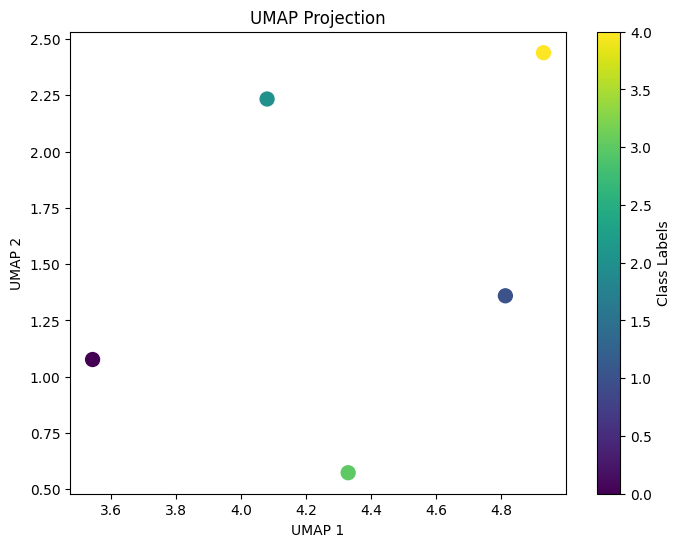

In [9]:
data_np = data.numpy()  # Convert to NumPy

# Initialize UMAP and fit-transform the data
umap_reducer = umap.UMAP(n_components=2, random_state=42)
data_umap = umap_reducer.fit_transform(data_np)

# Plot the UMAP result
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_umap[:, 0], data_umap[:, 1], c=labels, cmap='viridis', s=100)
plt.colorbar(scatter, label="Class Labels")
plt.title("UMAP Projection")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()


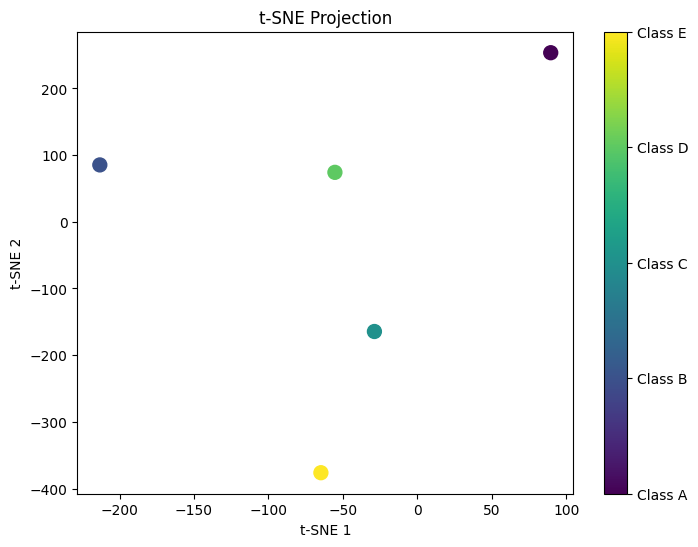

In [13]:
# Initialize t-SNE and fit-transform the data
tsne = TSNE(n_components=2, random_state=42, perplexity=2)
data_tsne = tsne.fit_transform(data_np)
class_names = ['Class A', 'Class B', 'Class C', 'Class D', 'Class E']

# Plot the t-SNE result
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels, cmap='viridis', s=100)
cbar = plt.colorbar(scatter, ticks=range(len(class_names)))
cbar.ax.set_yticklabels(class_names) 
plt.title("t-SNE Projection")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()
